# Import Libraries

In [1]:
#libraries for data understanding
import pandas as pd
import numpy as np
#libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as pyo
import plotly.graph_objs as go
import plotly.express as px

#to remove warningd
import warnings
warnings.filterwarnings('ignore')

# Importing Dataset

In [2]:
df = pd.read_csv("/content/hotel_bookings.csv")

**The columns and the data it represents are listed below:**

1. hotel : Name of the hotel (Resort Hotel or City Hotel)

2. is_canceled : If the booking was canceled (1) or not (0)

3. lead_time: Number of days before the actual arrival of the guests

4. arrival_date_year : Year of arrival date

5. arrival_date_month : Month of month arrival date

6. arrival_date_week_number : Week number of year for arrival date

7. arrival_date_day_of_month : Day of arrival date

8. stays_in_weekend_nights : Number of weekend nights (Saturday or Sunday) spent at the hotel by the guests.

9. stays_in_week_nights : Number of weeknights (Monday to Friday) spent at the hotel by the guests.

10. adults : Number of adults among guests

11. children : Number of children among guests

12. babies : Number of babies among guests

13. meal : Type of meal booked

14. country : Country of guests

15. market_segment : Designation of market segment

16. distribution_channel : Name of booking distribution channel

17. is_repeated_guest : If the booking was from a repeated guest (1) or not (0)

18. previous_cancellations : Number of previous bookings that were cancelled by the customer prior to the current booking

19. previous_bookings_not_canceled : Number of previous bookings not cancelled by the customer prior to the current booking

20. reserved_room_type : Code of room type reserved

21. assigned_room_type : Code of room type assigned

22. booking_changes : Number of changes/amendments made to the booking

23. deposit_type : Type of the deposit made by the guest

24. agent : ID of travel agent who made the booking

25. company : ID of the company that made the booking

26. days_in_waiting_list : Number of days the booking was in the waiting list

27. customer_type : Type of customer, assuming one of four categories

28. Average_daily_rate : Average Daily Rate, as defined by dividing the sum of all lodging transactions by the total number of staying nights

29. required_car_parking_spaces : Number of car parking spaces required by the customer

30. total_of_special_requests : Number of special requests made by the customer

31. reservation_status : Reservation status (Canceled, Check-Out or No-Show)

32. reservation_status_date : Date at which the last reservation status was updated

# Data cleaning

In [4]:
#viewing first 5 rows
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/7/2015


In [5]:
#shape of the column
print("Number of Rows in dataset",df.shape[1])
print("Number of Columns in dataset",df.shape[0])

Number of Rows in dataset 32
Number of Columns in dataset 119390


In [6]:
#columns in dataset
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [7]:
#datatype of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

`reservation_status_date` column is string datatype so need to change to datatime datatype

In [8]:
#converting the Reservation status data column
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

In [10]:
#nformation about categorical columns
df.describe(include = 'object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166


In [9]:
#unique values in all categorical columns
for column in df.describe(include = 'object'):
  print(column)
  print(df[column].unique())
  print('-*'*50)


hotel
['Resort Hotel' 'City Hotel']
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK

In [11]:
#checking missing values
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [12]:
#droping the company and agent columns
df.drop(['company','agent'],axis =1,inplace = True)

In [13]:
#droping rows having null values
df.dropna(inplace = True)

In [14]:
#statistical information of Numerical columns
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


In [15]:
df = df[df['adr']<5000]

**Outliers Detection and clipping**

In [16]:
def detect_outliers(dataframe,column):
  Q1 = dataframe[column].quantile(0.25)
  Q3 = dataframe[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_fence = Q1 - 1.5*(IQR)
  upper_fence = Q3 + 1.5*(IQR)
  total_outliers = dataframe.loc[(dataframe[column] < lower_fence) | (dataframe[column] > upper_fence) ]
  print("LowerFence: {}, UpperFence: {}\n{} Outliers present in {}".format(lower_fence, upper_fence, len(total_outliers), column)) 

In [17]:
#outliers in every column
for column in df.describe():
    print(column)
    outliers = detect_outliers(df, column)
    if outliers is not None:
        print(outliers)
    print('-'*50)

is_canceled
LowerFence: -1.5, UpperFence: 2.5
0 Outliers present in is_canceled
--------------------------------------------------
lead_time
LowerFence: -196.5, UpperFence: 375.5
2982 Outliers present in lead_time
--------------------------------------------------
arrival_date_year
LowerFence: 2014.5, UpperFence: 2018.5
0 Outliers present in arrival_date_year
--------------------------------------------------
arrival_date_week_number
LowerFence: -17.0, UpperFence: 71.0
0 Outliers present in arrival_date_week_number
--------------------------------------------------
arrival_date_day_of_month
LowerFence: -14.5, UpperFence: 45.5
0 Outliers present in arrival_date_day_of_month
--------------------------------------------------
stays_in_weekend_nights
LowerFence: -3.0, UpperFence: 5.0
263 Outliers present in stays_in_weekend_nights
--------------------------------------------------
stays_in_week_nights
LowerFence: -2.0, UpperFence: 6.0
3341 Outliers present in stays_in_week_nights
---------

In [18]:
#clipping the outiers
def clip_outliers(dataframe, column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_fence = Q1 - 1.5*(IQR)
    upper_fence = Q3 + 1.5*(IQR)
    dataframe[column] = dataframe[column].clip(lower_fence, upper_fence)


In [19]:
#After clipping the ouliers
for column in df.describe():
  clip_outliers(df, column)
    

In [20]:
#After clipping the ouliers
for column in df.describe():
    print(column)
    outliers = detect_outliers(df, column)
    if outliers is not None:
        print(outliers)
    print('-'*50)

is_canceled
LowerFence: -1.5, UpperFence: 2.5
0 Outliers present in is_canceled
--------------------------------------------------
lead_time
LowerFence: -196.5, UpperFence: 375.5
0 Outliers present in lead_time
--------------------------------------------------
arrival_date_year
LowerFence: 2014.5, UpperFence: 2018.5
0 Outliers present in arrival_date_year
--------------------------------------------------
arrival_date_week_number
LowerFence: -17.0, UpperFence: 71.0
0 Outliers present in arrival_date_week_number
--------------------------------------------------
arrival_date_day_of_month
LowerFence: -14.5, UpperFence: 45.5
0 Outliers present in arrival_date_day_of_month
--------------------------------------------------
stays_in_weekend_nights
LowerFence: -3.0, UpperFence: 5.0
0 Outliers present in stays_in_weekend_nights
--------------------------------------------------
stays_in_week_nights
LowerFence: -2.0, UpperFence: 6.0
0 Outliers present in stays_in_week_nights
-----------------

# **Data Visualization**

**Reservation Status**

In [21]:
cancelled_percent = df['is_canceled'].value_counts(normalize = True)
cancelled_percent

0    0.628653
1    0.371347
Name: is_canceled, dtype: float64

<BarContainer object of 2 artists>

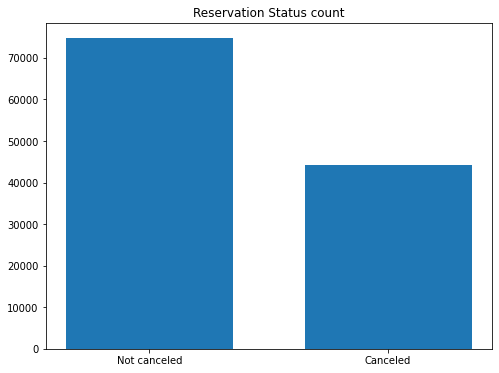

In [22]:
plt.figure(figsize = (8,6))
plt.title("Reservation Status count")
plt.bar(['Not canceled','Canceled'],df['is_canceled'].value_counts(),width = 0.7)

Percentage of reservations that are canceled and those that are not. It is obvious that there are still a significant number of reservations that have not been canceled. There are still 37% of clients who canceled their reservation, which has a significant impact on the hotels' earnings.

In [23]:
#cancelation percentage in resort hotels
resort_hotels_df = df[df['hotel'] == 'Resort Hotel']
resort_hotels_df['is_canceled'].value_counts(normalize = True)

0    0.72025
1    0.27975
Name: is_canceled, dtype: float64

In [24]:
#cancelation percentage in city hotels
city_hotels_df = df[df['hotel'] == 'City Hotel']
city_hotels_df['is_canceled'].value_counts(normalize = True)

0    0.582918
1    0.417082
Name: is_canceled, dtype: float64

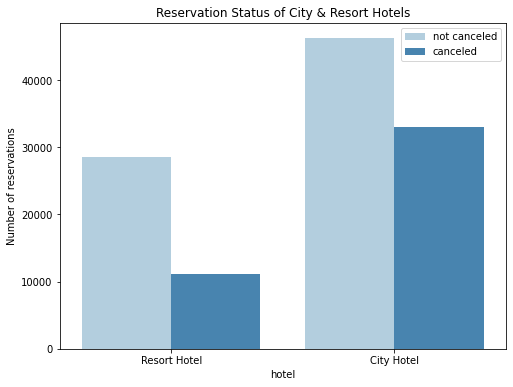

In [25]:
plt.figure(figsize = (8,6))
sns.countplot(x = 'hotel', hue = 'is_canceled', data = df, palette = 'Blues')
plt.xlabel('hotel')
plt.title("Reservation Status of City & Resort Hotels")
plt.ylabel('Number of reservations')
plt.legend(['not canceled', 'canceled'])

plt.show()

**Guest from which country canceling most**

In [26]:
guest_not_cancel = df[df['is_canceled'] == 0]['country'].value_counts().reset_index()
guest_not_cancel.columns = ['country','Number of guest']
total_guest_not_cancel = guest_not_cancel['Number of guest'].sum()
guest_not_cancel['Guest in %'] = round(guest_not_cancel['Number of guest'] / total_guest_not_cancel * 100 ,2)

In [27]:
guest_not_cancel.head()

,country,Number of guest,Guest in %
0,PRT,21071,28.19
1,GBR,9676,12.95
2,FRA,8481,11.35
3,ESP,6391,8.55
4,DEU,6069,8.12


In [28]:
world_map_0 = px.choropleth(guest_not_cancel,
                             locations = guest_not_cancel['country'],
                             color = guest_not_cancel['Number of guest'],
                             hover_name = guest_not_cancel['country'],
                             color_continuous_scale=px.colors.sequential.Plasma,
                            
                             title = "Guest from countries not cancelled"
                             )
world_map_0.update_layout(coloraxis_colorbar=dict(
    title="Number of Guests",
    thicknessmode="pixels", thickness=15,
    lenmode="pixels", len=300,
    yanchor="middle", y=0.5,
    ticks="outside", ticksuffix=" guests",
    ))
world_map_0.update_layout(margin=dict(l=0, r=0, t=60, b=0))
world_map_0.update_layout(title=dict(x=0.5, y=0.95))
world_map_0.show()

 Guest from countries cancelled the most

In [29]:
guest_cancel = df[df['is_canceled'] == 1]['country'].value_counts().reset_index()
guest_cancel.columns = ['country','Number of guest']
total_guest_cancel = guest_not_cancel['Number of guest'].sum()
guest_cancel['Guest in %'] = round(guest_cancel['Number of guest'] / total_guest_cancel * 100 ,2)

In [30]:
guest_cancel.head()

,country,Number of guest,Guest in %
0,PRT,27514,36.81
1,GBR,2453,3.28
2,ESP,2177,2.91
3,FRA,1934,2.59
4,ITA,1333,1.78


In [31]:
world_map_1 = px.choropleth(guest_not_cancel,
                             locations = guest_cancel['country'],
                             color = guest_cancel['Number of guest'],
                             hover_name = guest_cancel['country'],
                             color_continuous_scale=px.colors.sequential.Plasma,
                            
                             title = "Guest from countries cancelled most"
                             )
world_map_1.update_layout(coloraxis_colorbar=dict(
    title="Number of Guests",
    thicknessmode="pixels", thickness=15,
    lenmode="pixels", len=300,
    yanchor="middle", y=0.5,
    ticks="outside", ticksuffix=" guests",
    ))
world_map_1.update_layout(margin=dict(l=0, r=0, t=60, b=0))
world_map_1.update_layout(title=dict(x=0.5, y=0.95))
world_map_1.show()

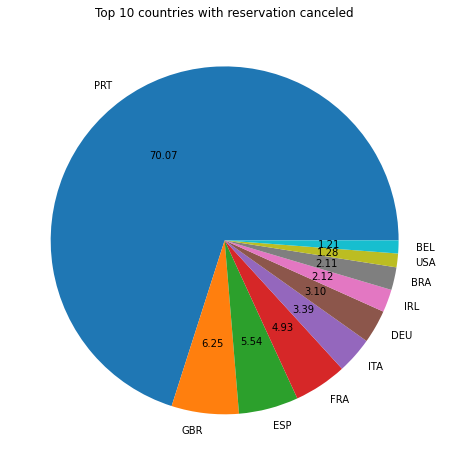

In [32]:
cancelled_data = df[df['is_canceled'] == 1]
top_10_country = cancelled_data['country'].value_counts()[:10]
plt.figure(figsize = (8,8))
plt.title('Top 10 countries with reservation canceled')
plt.pie(top_10_country, autopct = '%.2f', labels = top_10_country.index)
plt.show()


* Guests from Portugal, Great Britan, Spain, France.So Guest from these countries cancelling most


<AxesSubplot:xlabel='arrival_date_month', ylabel='count'>

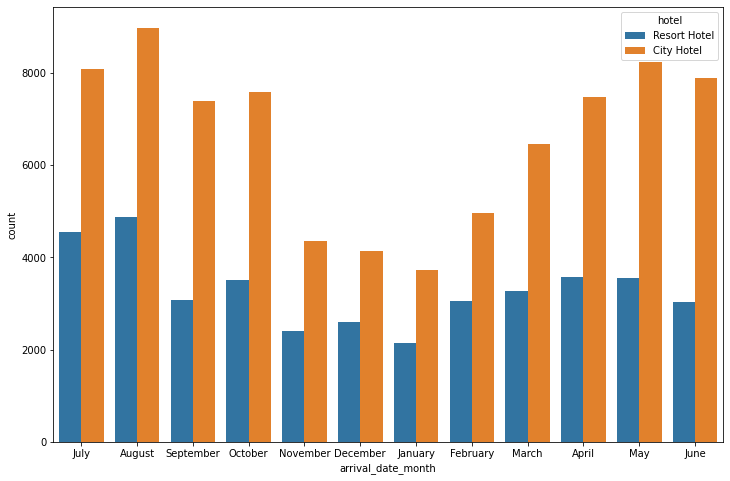

In [46]:
plt.figure(figsize=(12,8)) 
sns.countplot(x='arrival_date_month', hue="hotel", data=df)

Since this Data belons to Western Nations, there the **Summer season** is between june to september where we can see the **high bookings** and in Winter season from November to February Bookings is low

In [36]:
resort_hotel = resort_hotels_df.groupby('reservation_status_date')[['adr']].mean()
city_hotel = city_hotels_df.groupby('reservation_status_date')[['adr']].mean()

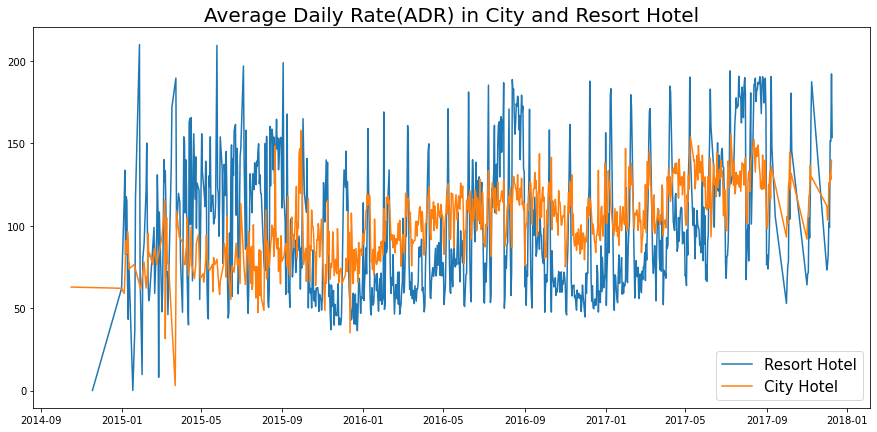

In [40]:
plt.figure(figsize = (15,7))
plt.title('Average Daily Rate(ADR) in City and Resort Hotel', fontsize = 20)
plt.plot(resort_hotel.index, resort_hotel['adr'], label = 'Resort Hotel')
plt.plot(city_hotel.index, city_hotel['adr'], label = 'City Hotel')
plt.legend(fontsize = 15)
plt.show()

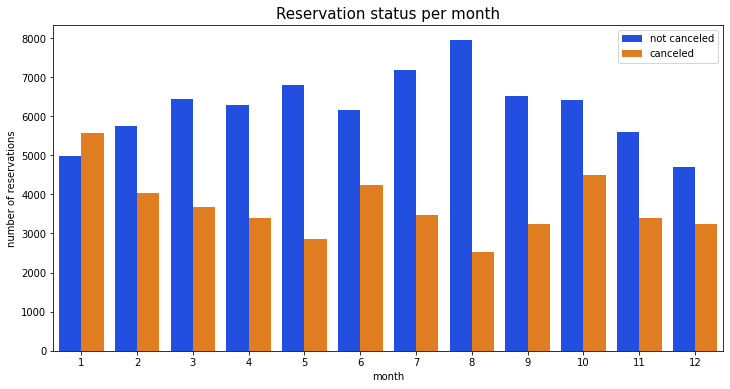

In [41]:
df['month'] = df['reservation_status_date'].dt.month
plt.figure(figsize = (12,6))
ax1 = sns.countplot(x = 'month', hue = 'is_canceled', data = df, palette = 'bright')
legend_labels,_ = ax1. get_legend_handles_labels()
ax1.legend(bbox_to_anchor=(1,1))
plt.title('Reservation status per month', size = 15)
plt.xlabel('month')
plt.ylabel('number of reservations')
plt.legend(['not canceled', 'canceled'])
plt.show()

Number of confirmed reservation in **August** whereas most Cancelled Reservations in **Janauary**

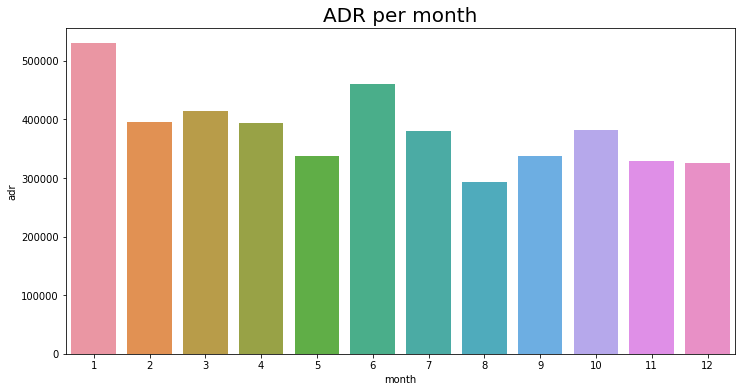

In [44]:
df['month'] = df['reservation_status_date'].dt.month
plt.figure(figsize = (12,6))
plt.title('ADR per month', fontsize = 20)
sns.barplot('month', 'adr', data = df[df['is_canceled'] == 1].groupby('month')[['adr']].sum().reset_index())
plt.show()

From the previous graph ,we came to know Number of confirmed reservation in **August** whereas most Cancelled Reservations in **Janauary**.The Reason are Average Daily Rate(ADR) is more in Janauary and less in August Compared to all other months.It is clearly evident that price hike is main reason for more cancellations.

In [ ]:
df['market_segment'].value_counts(normalize = True)

Online TA        0.474377
Offline TA/TO    0.203193
Groups           0.166581
Direct           0.104696
Corporate        0.042987
Complementary    0.006173
Aviation         0.001993
Name: market_segment, dtype: float64

In [ ]:
cancelled_data['market_segment'].value_counts(normalize = True)

Online TA        0.469696
Groups           0.273985
Offline TA/TO    0.187466
Direct           0.043486
Corporate        0.022151
Complementary    0.002038
Aviation         0.001178
Name: market_segment, dtype: float64

<AxesSubplot:xlabel='market_segment'>

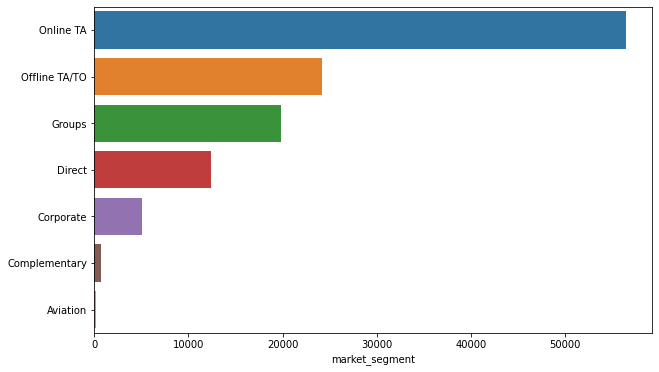

In [ ]:
plt.figure(figsize=(10,6))
x =df['market_segment'].value_counts()
y = df['market_segment'].value_counts().index.tolist()
sns.barplot(x,y)

<AxesSubplot:xlabel='market_segment'>

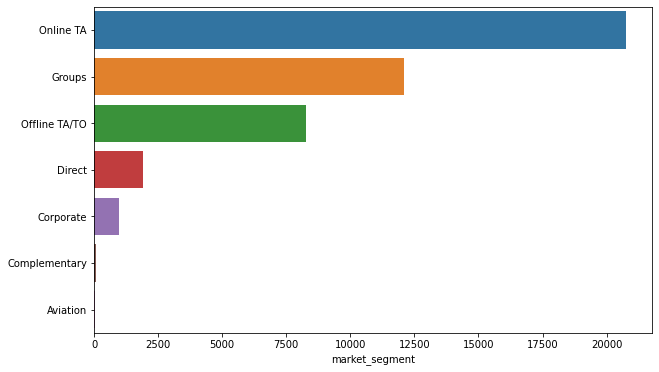

In [ ]:
plt.figure(figsize=(10,6))
x =cancelled_data['market_segment'].value_counts()
y = cancelled_data['market_segment'].value_counts().index.tolist()
sns.barplot(x,y)

From the above two plots, we can conclude that **Online booking** is high in both Resort and city hotels.The cancellations also high (around50%) in online booking. Reason may be - In online booking people get impressed by the photos of hotels and get booking. when they visit the hotels it's not as same in picture (low maintenance) so they easily rejecting in online.

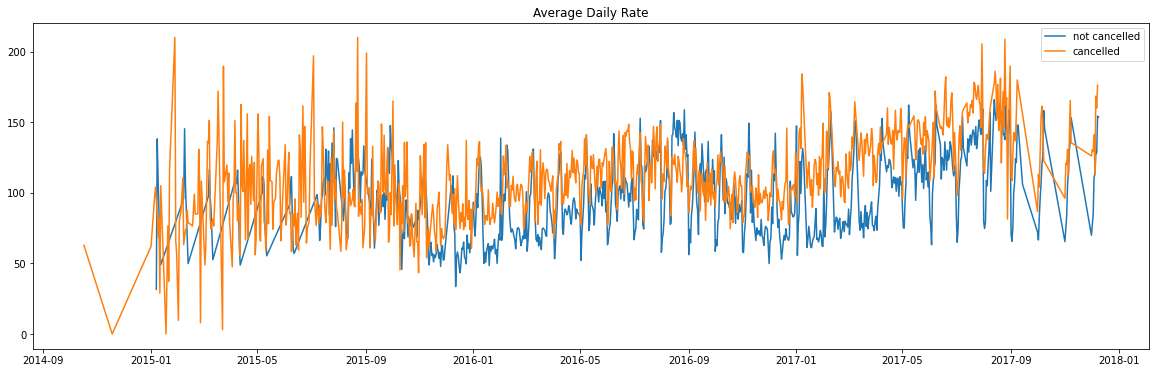

In [50]:
cancelled_df_adr = cancelled_data.groupby('reservation_status_date')[['adr']].mean()
cancelled_df_adr.reset_index(inplace = True)
cancelled_df_adr.sort_values('reservation_status_date', inplace = True)

not_cancelled_data = df[df['is_canceled'] == 0]
not_cancelled_df_adr = not_cancelled_data.groupby('reservation_status_date')[['adr']].mean()
not_cancelled_df_adr.reset_index(inplace = True)
not_cancelled_df_adr.sort_values('reservation_status_date', inplace = True)

plt.figure(figsize = (20,6))
plt.title('Average Daily Rate')
plt.plot(not_cancelled_df_adr['reservation_status_date'],not_cancelled_df_adr['adr'], label = 'not cancelled')
plt.plot(cancelled_df_adr['reservation_status_date'],cancelled_df_adr['adr'], label = 'cancelled')
plt.legend()
plt.show()

In [ ]:
#above graph looks like messy so taking from 2019 to 09-2017
cancelled_df_adr = cancelled_df_adr[(cancelled_df_adr['reservation_status_date']>'2016') & (cancelled_df_adr['reservation_status_date']<'2017-09')]
not_cancelled_df_adr = not_cancelled_df_adr[(not_cancelled_df_adr['reservation_status_date']>'2016') & (not_cancelled_df_adr['reservation_status_date']<'2017-09')]

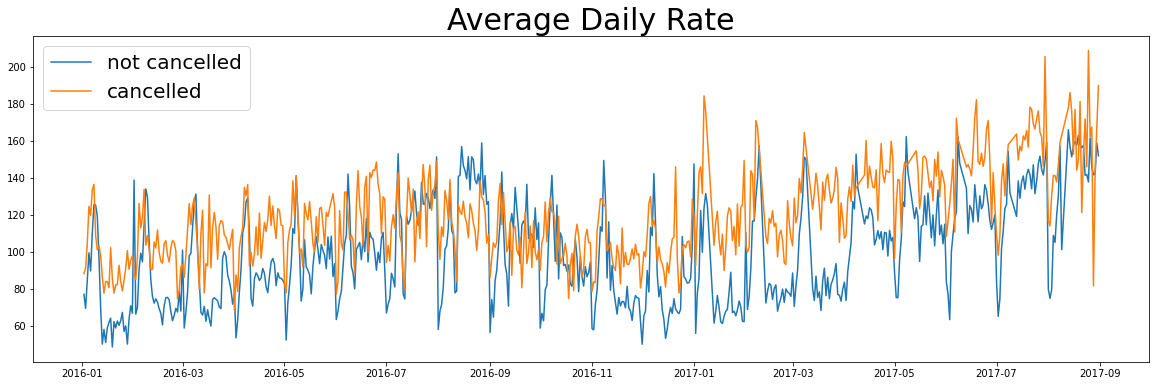

In [ ]:
plt.figure(figsize = (20,6))
plt.title('Average Daily Rate', fontsize = 30)
plt.plot(not_cancelled_df_adr['reservation_status_date'],not_cancelled_df_adr['adr'], label = 'not cancelled')
plt.plot(cancelled_df_adr['reservation_status_date'],cancelled_df_adr['adr'], label = 'cancelled')
plt.legend(fontsize = 20)
plt.show()

<AxesSubplot:title={'center':'Deposit type'}, xlabel='deposit_type', ylabel='Count'>

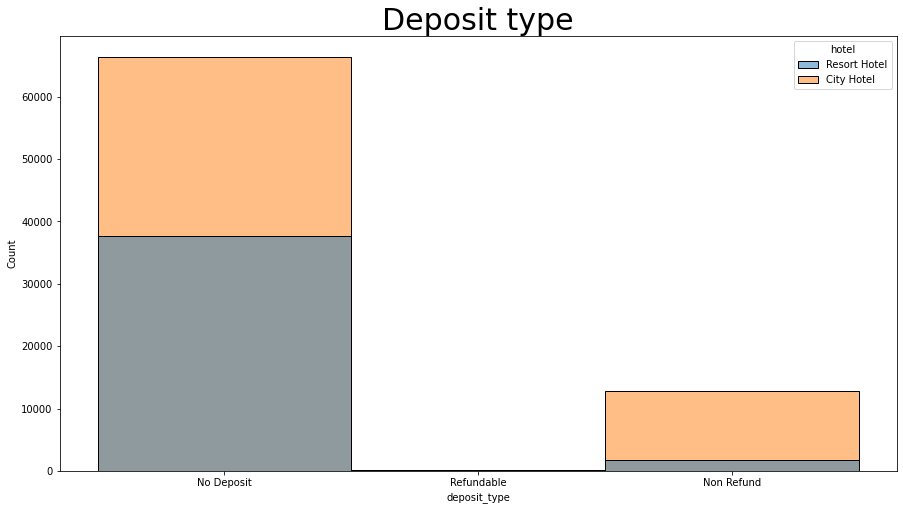

In [45]:
#Deposit type vs Cancelations
plt.figure(figsize=(15,8))
plt.title('Deposit type', fontsize = 30)
sns.histplot(data=df, x="deposit_type", hue="hotel")

Most of the hotels are booked in `No deposit` type .so people easily cancelling their bookings whereas in Non refund cancellation is very low.

**Suggestions** 


*  Cancellation rates rise as the price does. In order to preventcancellations of reservations, hotels could work on their pricing strategies and try to lower the rates for specific hotels based on locations.
*  Can provide some discounts to the consumers to repeated Customers
*  Allocate more marketing budget during peak booking seasons ie. from June to September
*  In the month of January, hotels can start campaigns or marketing with a reasonable amount to increase their revenue as the cancellation is the highest in this month